<a href="https://colab.research.google.com/github/ZhalgasbekAyaz/Implicit-Finite-difference-scheme-for-Cubic-Schrodinger-Equation/blob/main/Bratsos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#Initial conditions

In [ ]:
h = 1
l = 0.01
factor = l/h**2
x = np.arange(-80, 100+h, h)
t = np.arange(0, 36+l, l)

In [ ]:
def u(x):
    real_part = cmath.sqrt(0.02) * 1 / cmath.cosh(cmath.sqrt(0.01) * x)
    imag_part = cmath.cos(0.05*x) + 1j* cmath.sin(0.05*x)
    return real_part * imag_part

h_values = np.linspace(-80, 100, 181)
u_values = np.zeros(181, dtype=complex)

# Compute u(x) at each grid point
for i in range(181):
    u_values[i] = u(i*h-80)

#u_values

In [ ]:
n = len(x)
m = len(t)
T = np.zeros((n,m), dtype = complex)
T[:, 0] = u_values
T[:, 1] = T[:, 0]
T

array([[-6.20197650e-05+7.18078039e-05j, -6.20197650e-05+7.18078039e-05j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-7.24231203e-05+7.58350212e-05j, -7.24231203e-05+7.58350212e-05j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-8.41286819e-05+7.97055870e-05j, -8.41286819e-05+7.97055870e-05j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       ...,
       [ 2.92527506e-06-1.54088661e-05j,  2.92527506e-06-1.54088661e-05j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 3.34042590e-06-1.37928043e-05j,  3.

#Matrix A

In [ ]:
def tridiagonal_matrix(N, a, b, c):
    """
    Generates a tridiagonal matrix of size N x N with specified values on the diagonals.

    Parameters:
        N (int): Size of the square matrix.
        a (complex): Value for the main diagonal.
        b (complex): Value for the superdiagonal.
        c (complex): Value for the subdiagonal.

    Returns:
        np.ndarray: Tridiagonal matrix.
    """
    matrix = np.zeros((N, N), dtype=complex)
    np.fill_diagonal(matrix, a)
    np.fill_diagonal(matrix[1:, :-1], b)
    np.fill_diagonal(matrix[:-1, 1:], c)
    return matrix

In [ ]:
N = 181  # Size of the matrix
a = 2j - 2*factor  # Main diagonal value
b = factor  # Superdiagonal value
c = factor  # Subdiagonal value
A = tridiagonal_matrix(N, a, b, c)

In [ ]:
matrix_fix = np.zeros((N,N),dtype = complex)
matrix_fix[0,1] = factor
matrix_fix[N-1, N-2] = factor

In [ ]:
A = A + matrix_fix
A

array([[-0.02+2.j,  0.02+0.j,  0.  +0.j, ...,  0.  +0.j,  0.  +0.j,
         0.  +0.j],
       [ 0.01+0.j, -0.02+2.j,  0.01+0.j, ...,  0.  +0.j,  0.  +0.j,
         0.  +0.j],
       [ 0.  +0.j,  0.01+0.j, -0.02+2.j, ...,  0.  +0.j,  0.  +0.j,
         0.  +0.j],
       ...,
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j, ..., -0.02+2.j,  0.01+0.j,
         0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j, ...,  0.01+0.j, -0.02+2.j,
         0.01+0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j, ...,  0.  +0.j,  0.02+0.j,
        -0.02+2.j]])

#RHS

In [ ]:
for i in range(2,m):
  b = T.copy()
  for z in range(0,n):
      if z == 0:
        b[z, i] = -factor * 2 *b[1,i-1] + 2j * b[0,i-1] + 2*factor*b[0,i-1] - l * 2 * abs(b[0,i-1])**2 * b[0,i-1] - l * 3 * abs(b[0,i-1])**2 * b[0,i-1] + l * 2 * abs(b[0,i-1])*abs(b[0,i-2])*b[0,i-1] + l * abs(b[0,i-1])**2 * b[0,i-2]
      elif z == N - 1:
        b[z, i] = -factor * 2 *b[-2,i-1] + 2j * b[-1,i-1] + 2*factor*b[-1,i-1] - l * 2 * abs(b[-1,i-1])**2 * b[-1,i-1] - l * 3 * abs(b[-1,i-1])**2 * b[-1,i-1] + l * 2 * abs(b[-1,i-1])*abs(b[-1,i-2])*b[-1,i-1] + l * abs(b[-1,i-1])**2 * b[-1,i-2]
      else:
        b[z, i] = -factor * b[z-1,i-1] - factor * b[z+1, i-1] + 2j * b[z,i-1] + 2*factor*b[z,i-1] - l * 2 * abs(b[z,i-1])**2 * b[z,i-1] - l * 3 * abs(b[z,i-1])**2 * b[z,i-1] + l * 2 * abs(b[z,i-1])*abs(b[z,i-2])*b[z,i-1] + l * abs(b[z,i-1])**2 * b[z,i-2]
  solution = np.linalg.solve(A,b[:,i])
  solution
  T[:,i] = solution
T

array([[-6.20197650e-05+7.18078039e-05j, -6.20197650e-05+7.18078039e-05j,
        -6.21022471e-05+7.16005870e-05j, ...,
        -1.02787664e-04+6.68565289e-06j, -1.02778565e-04+6.66830208e-06j,
        -1.02769679e-04+6.65061737e-06j],
       [-7.24231203e-05+7.58350212e-05j, -7.24231203e-05+7.58350212e-05j,
        -7.24205808e-05+7.58215736e-05j, ...,
        -1.03646748e-04+6.22553296e-06j, -1.03654561e-04+6.21850511e-06j,
        -1.03662153e-04+6.21181328e-06j],
       [-8.41286819e-05+7.97055870e-05j, -8.41286819e-05+7.97055870e-05j,
        -8.41262310e-05+7.96913056e-05j, ...,
        -1.05225636e-04+6.55727806e-06j, -1.05216321e-04+6.53926469e-06j,
        -1.05207228e-04+6.52092371e-06j],
       ...,
       [ 2.92527506e-06-1.54088661e-05j,  2.92527506e-06-1.54088661e-05j,
         2.92672248e-06-1.54101895e-05j, ...,
         1.81476015e-05-2.51518484e-05j,  1.81525774e-05-2.51528287e-05j,
         1.81576040e-05-2.51538286e-05j],
       [ 3.34042590e-06-1.37928043e-05j,  3.

In [ ]:
def u_exact(x,t):
    real_part = cmath.sqrt(0.02) * 1 / cmath.cosh(cmath.sqrt(0.01) * (x - 0.1*t))
    imag_part = cmath.cos(0.05*x - 3/400 * t) + 1j* cmath.sin(0.05*x - 3/400 * t)
    return real_part * imag_part

u_exact_values = np.zeros((181,3601), dtype=complex)

for i in range(181):
  for j in range(3601):
    u_exact_values[i,j] = u_exact(i*h-80,j*l)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


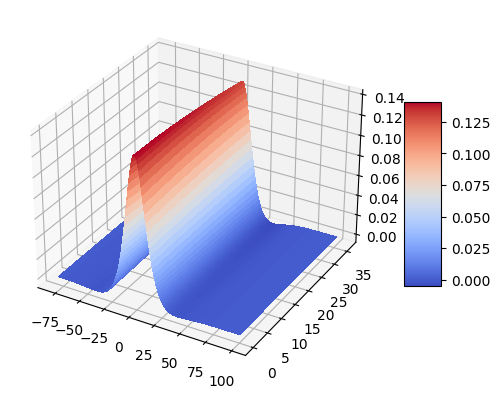

In [ ]:
# plot 3d surface
# create a meshgrid of (x,t) points
# T and X are 2-d arrays
M, X = np.meshgrid(t,x)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Use X and T arrays to plot u
# shape of X, T and u must to be the same
# but shape of u is [40,1601] and I will skip last row while plotting
surf = ax.plot_surface(X, M, T[:,:3800], rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()